#Задача 1: сравнение предложений


Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:

- кошки (животные)
- UNIX-утилита cat для вывода содержимого файлов
- версии операционной системы OS X, названные в честь семейства кошачьих

Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

sentences.txt

Выполните следующие шаги:

1. Скачайте файл с предложениями (sentences.txt).
2. Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().
3. Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.
4. Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.
5. Создайте матрицу размера n * d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.
6. Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание. Само предложение (In comparison to dogs, cats have not undergone... ) имеет индекс 0.
7. Запишите полученные числа в файл, разделив пробелом. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-1.txt).
8. Совпадают ли ближайшие два предложения по тематике с первым? Совпадают ли тематики у следующих по близости предложений?

Разумеется, использованный вами метод крайне простой. Например, он не учитывает формы слов (так, cat и cats он считает разными словами, хотя по сути они означают одно и то же), не удаляет из текстов артикли и прочие ненужные слова. Позже мы будем подробно изучать анализ текстов, где выясним, как достичь высокого качества в задаче поиска похожих предложений.

##1. Скачайте файл с предложениями (sentences.txt).

In [1]:
input_text = []
with open('/content/drive/MyDrive/Colab Notebooks/Coursera_ML_DA/C1W2_sentences.txt', 'r') as inpt:
    for line in inpt:
        input_text.append(line.strip().lower())

In [2]:
input_text

['in comparison to dogs, cats have not undergone major changes during the domestication process.',
 'as cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.',
 'a common interactive use of cat for a single file is to output the content of a file to standard output.',
 'cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.',
 'in one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.',
 'the domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.',
 'domestic cats are similar in size to the other members of the genus felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).',
 'however, if the output is piped or redirected, cat is unnecessary.',
 'cat with one named file is safer where human error i

##3. Произведите токенизацию, 
то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.

In [3]:
import re
tokens = []
for line in input_text:
    tokens.append(re.split('[^a-z]', line))
for i in range(len(tokens)):
    tokens[i] = ' '.join(tokens[i]).split()

In [4]:
print(*tokens, sep='\n')

['in', 'comparison', 'to', 'dogs', 'cats', 'have', 'not', 'undergone', 'major', 'changes', 'during', 'the', 'domestication', 'process']
['as', 'cat', 'simply', 'catenates', 'streams', 'of', 'bytes', 'it', 'can', 'be', 'also', 'used', 'to', 'concatenate', 'binary', 'files', 'where', 'it', 'will', 'just', 'concatenate', 'sequence', 'of', 'bytes']
['a', 'common', 'interactive', 'use', 'of', 'cat', 'for', 'a', 'single', 'file', 'is', 'to', 'output', 'the', 'content', 'of', 'a', 'file', 'to', 'standard', 'output']
['cats', 'can', 'hear', 'sounds', 'too', 'faint', 'or', 'too', 'high', 'in', 'frequency', 'for', 'human', 'ears', 'such', 'as', 'those', 'made', 'by', 'mice', 'and', 'other', 'small', 'animals']
['in', 'one', 'people', 'deliberately', 'tamed', 'cats', 'in', 'a', 'process', 'of', 'artificial', 'selection', 'as', 'they', 'were', 'useful', 'predators', 'of', 'vermin']
['the', 'domesticated', 'cat', 'and', 'its', 'closest', 'wild', 'ancestor', 'are', 'both', 'diploid', 'organisms', 't

##4. Составьте список всех слов, 
встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.

In [5]:
dict = dict()
i = 0
for strng in tokens:
    for word in strng:
        if word not in dict:
            dict[word] = i
            i += 1
print(dict)

{'in': 0, 'comparison': 1, 'to': 2, 'dogs': 3, 'cats': 4, 'have': 5, 'not': 6, 'undergone': 7, 'major': 8, 'changes': 9, 'during': 10, 'the': 11, 'domestication': 12, 'process': 13, 'as': 14, 'cat': 15, 'simply': 16, 'catenates': 17, 'streams': 18, 'of': 19, 'bytes': 20, 'it': 21, 'can': 22, 'be': 23, 'also': 24, 'used': 25, 'concatenate': 26, 'binary': 27, 'files': 28, 'where': 29, 'will': 30, 'just': 31, 'sequence': 32, 'a': 33, 'common': 34, 'interactive': 35, 'use': 36, 'for': 37, 'single': 38, 'file': 39, 'is': 40, 'output': 41, 'content': 42, 'standard': 43, 'hear': 44, 'sounds': 45, 'too': 46, 'faint': 47, 'or': 48, 'high': 49, 'frequency': 50, 'human': 51, 'ears': 52, 'such': 53, 'those': 54, 'made': 55, 'by': 56, 'mice': 57, 'and': 58, 'other': 59, 'small': 60, 'animals': 61, 'one': 62, 'people': 63, 'deliberately': 64, 'tamed': 65, 'artificial': 66, 'selection': 67, 'they': 68, 'were': 69, 'useful': 70, 'predators': 71, 'vermin': 72, 'domesticated': 73, 'its': 74, 'closest': 

##5. Создайте матрицу размера n * d, 
где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.

In [6]:
matrix = [[0 for j in range(len(dict))] for i in range(len(tokens))]
for i in range(len(tokens)):
    for word in tokens[i]:
        matrix[i][dict[word]] += 1
print(*matrix, sep='\n')

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

##6. Найдите косинусное расстояние 
от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание. Само предложение (In comparison to dogs, cats have not undergone... ) имеет индекс 0.

In [9]:
import scipy.spatial.distance as ssd
# import numpy as np

dist = [0]
a = matrix[0]
for i in range(1, len(matrix)):
    b = matrix[i]
    dist.append(ssd.cosine(a, b))
for i in range(len(dist)):
    print(i, dist[i])

0 0
1 0.9527544408738466
2 0.8644738145642124
3 0.8951715163278082
4 0.7770887149698589
5 0.9402385695332803
6 0.7327387580875756
7 0.9258750683338899
8 0.8842724875284311
9 0.9055088817476932
10 0.8328165362273942
11 0.8804771390665607
12 0.8396432548525454
13 0.8703592552895671
14 0.8740118423302576
15 0.9442721787424647
16 0.8406361854220809
17 0.956644501523794
18 0.9442721787424647
19 0.8885443574849294
20 0.8427572744917122
21 0.8250364469440588


In [10]:
min_a = min_b = 1
for i in range(1, len(dist)):
    if dist[i] < dist[min_a]:
        min_b = min_a
        min_a = i
print(min_a, min_b) 

6 4


##7. Запишите полученные числа в файл, 
разделив пробелом. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-1.txt).

In [18]:
with open('/content/drive/MyDrive/Colab Notebooks/Coursera_ML_DA/C1W2_answer1.txt', 'w') as out:
    print(out.write(str(min_a) + ' ' + str(min_b)))


3


#Задача 2: аппроксимация функции
Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
4. Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

##1. Сформируйте систему линейных уравнений 
(то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

Сначала зададим функцию f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), которая получает Х и возвращает У


In [23]:
# Задаем функцию f(x)
import math
def f(x):
    return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp( -x / 2)

In [24]:
# принимаем N и перемунную Х в количестве N+1
def input_nx():
    n = int(input('n => '))
    print(f'input {n+1} x => ', end='')
    xs = [float(i) for i in input().split()]

    for x in range(n+1):
        print(f'c{x}*x^{x} ', end=' ')
        if x < n: print('+ ', end='')
        if x == n: print('= f(x)')
    return n, xs

In [25]:
# Распечатываем систему уравнений для визуального эффекта
def print_arrays(n, xs):
    for x in xs:
        print(f'x={x}', end=': ')
        for i in range(n+1):
            print(f'c{i}*{x**i} ', end=' ')
            if i < n: print('+ ', end='')
            if i == n: print(f'= {f(x)}')

In [26]:
# Заполняем матрицу А и В на основе имеющихся иксов и результат вычисления f(x)
def fill_arrays(n, xs):
    array_A = []
    array_B = []
    for i in range(n+1):
        array_A.append([xs[i]**j for j in range(n+1)])
        array_B.append(f(xs[i]))
    return array_A, array_B

In [27]:
n, xs = input_nx()
print_arrays(n, xs)

n => 1
input 2 x => 1 15
c0*x^0  + c1*x^1  = f(x)
x=1.0: c0*1.0  + c1*1.0  = 3.252216865271419
x=15.0: c0*1.0  + c1*15.0  = 0.6352214195786656


In [28]:
array_A, array_B = fill_arrays(n, xs)
print(array_A, array_B)

[[1.0, 1.0], [1.0, 15.0]] [3.252216865271419, 0.6352214195786656]


In [29]:
import scipy.linalg as sl
solution = sl.solve(array_A, array_B)
print(solution)

[ 3.43914511 -0.18692825]


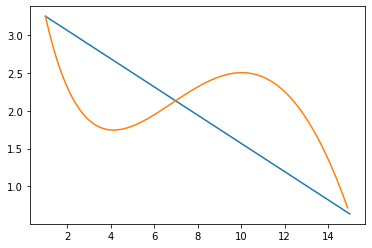

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


arr = np.arange(1, 15, 0.1)
f_arr = list(map(f, arr))

sns.lineplot(x=xs, y=[f(x) for x in xs], palette="bright")
sns.lineplot(x=arr, y=f_arr)

plt.show()

##2. Повторите те же шаги для многочлена второй степени, 
который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?

In [32]:
n, xs = input_nx()
print_arrays(n, xs)

array_A, array_B = fill_arrays(n, xs)
print('array_A:', array_A, '\narray_B:', array_B)

solution = sl.solve(array_A, array_B)
print('solution:', solution)

n => 2
input 3 x => 1 8 15
c0*x^0  + c1*x^1  + c2*x^2  = f(x)
x=1.0: c0*1.0  + c1*1.0  + c2*1.0  = 3.252216865271419
x=8.0: c0*1.0  + c1*8.0  + c2*64.0  = 2.316170159053224
x=15.0: c0*1.0  + c1*15.0  + c2*225.0  = 0.6352214195786656
array_A: [[1.0, 1.0, 1.0], [1.0, 8.0, 64.0], [1.0, 15.0, 225.0]] 
array_B: [3.252216865271419, 2.316170159053224, 0.6352214195786656]
solution: [ 3.32512949 -0.06531159 -0.00760104]


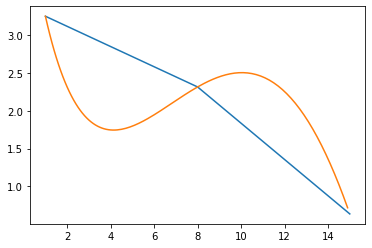

In [33]:
arr = np.arange(1, 15, 0.1)
f_arr = list(map(f, arr))

sns.lineplot(x=xs, y=[f(x) for x in xs], palette="bright")
sns.lineplot(x=arr, y=f_arr)

plt.show()

##3. Повторите те же шаги для многочлена третьей степени, 
который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)

In [34]:
n, xs = input_nx()
print_arrays(n, xs)

array_A, array_B = fill_arrays(n, xs)
print('array_A:', array_A, '\narray_B:', array_B)

solution = sl.solve(array_A, array_B)
print('solution:', solution)

n => 3
input 4 x => 1 4 10 15
c0*x^0  + c1*x^1  + c2*x^2  + c3*x^3  = f(x)
x=1.0: c0*1.0  + c1*1.0  + c2*1.0  + c3*1.0  = 3.252216865271419
x=4.0: c0*1.0  + c1*4.0  + c2*16.0  + c3*64.0  = 1.7468459495903677
x=10.0: c0*1.0  + c1*10.0  + c2*100.0  + c3*1000.0  = 2.5054164070002463
x=15.0: c0*1.0  + c1*15.0  + c2*225.0  + c3*3375.0  = 0.6352214195786656
array_A: [[1.0, 1.0, 1.0, 1.0], [1.0, 4.0, 16.0, 64.0], [1.0, 10.0, 100.0, 1000.0], [1.0, 15.0, 225.0, 3375.0]] 
array_B: [3.252216865271419, 1.7468459495903677, 2.5054164070002463, 0.6352214195786656]
solution: [ 4.36264154 -1.29552587  0.19333685 -0.00823565]


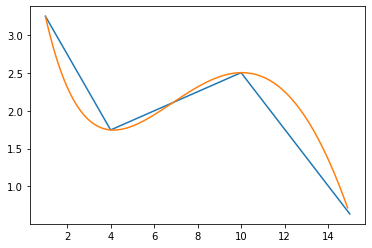

In [35]:
arr = np.arange(1, 15, 0.1)
f_arr = list(map(f, arr))

sns.lineplot(x=xs, y=[f(x) for x in xs], palette="bright")
sns.lineplot(x=arr, y=f_arr)

plt.show()

##4. Запишите полученные числа в файл, 
разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

In [44]:
print(str(solution)[2:-1])
with open('/content/drive/MyDrive/Colab Notebooks/Coursera_ML_DA/C1W2_answer2.txt', 'w') as out:
    print(out.write(str(solution)[2:-1]))

4.36264154 -1.29552587  0.19333685 -0.00823565
46
